In [1]:
#!pip install matplotlib

In [2]:
import numpy as np
import mnist
from matplotlib import pyplot as plt
import math
%matplotlib inline

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

train_images = (train_images/255.)-0.5
test_images = (test_images/255.)-0.5

In [3]:
batch_count = 6000
input_data = train_images.reshape(train_images.shape[0], -1)
input_data = np.split(input_data, batch_count)

input_test = test_images.reshape(test_images.shape[0], -1)
output_test = np.zeros((len(test_labels), 10))
for i in range(len(test_labels)):
    output_test[i][test_labels[i]] = 1.

output_data = np.zeros((len(train_labels), 10))
for i in range(len(train_labels)):
    output_data[i][train_labels[i]] = 1.
output_data = np.split(output_data, batch_count)

In [4]:
def sigm(x):
    return 1/(1 + np.exp(-1 * x))

In [5]:
# def relu(x):
    

In [6]:
def softmax(vector):
    e = np.exp(vector)
    return e / e.sum()

In [7]:
def softmax_grad(softmax):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

In [8]:
#def relu(x):

In [9]:
# 784 x 100 x 30 x 10
class NN:
    def __init__(self, n_epochs):
        self.W2 = np.random.rand(784, 100)
        self.B2 = np.random.rand(100)
        self.W1 = np.random.rand(100, 30)
        self.B1 = np.random.rand(30)
        self.W0 = np.random.rand(30, 10)
        self.B0 = np.random.rand(10)
        self.loss = []  
        self.n_epochs = n_epochs
        
    def forward(self, batch_in, batch_out):
        Z2 = np.dot(batch_in, self.W2)/784
        A2 = sigm(Z2 + self.B2)
        Z1 = np.dot(A2, self.W1)/100
        A1 = sigm(Z1 + self.B1)
        Z0 = np.dot(A1, self.W0)/30
        #A0 = softmax(Z0)
        A0 = sigm(Z0)
        
        diff = A0-batch_out
        self.last_loss = np.average(diff**2)

        dC = 2*(diff)
        dA0 = A0 * (1 - A0)
        dCdA0 = dC*dA0
        
        # d0 = dC dA0 A1
        d0 = np.dot(A1.T, dCdA0)

        # d1 = dC dA0 ( dA1 W0 A2)
        dA1 = A1 * (1 - A1)
        d1 = np.dot(A2.T, np.dot(dCdA0, self.W0.T) * dA1)
        
        # d2 = dC dA0 (dA2 W1 W0 A3)
        A3 = batch_in
        dA2 = A2 * (1 - A2)
        d2 = np.dot(A3.T, np.dot(np.dot(dCdA0, self.W0.T), self.W1.T) * dA2)

        self.W0 = self.W0 - 0.1 * d0
        self.W1 = self.W1 - 0.1 * d1
        self.W2 = self.W2 - 0.1 * d2
    
    def train(self, input_data, output_data):
        for n in range(self.n_epochs):
            for i in range(len(input_data)):
                nn.forward(input_data[i], output_data[i])
            self.loss += [self.last_loss]
    
    def test(self, input_test, output_test):
        Z2 = np.dot(input_test, self.W2)/784
        A2 = sigm(Z2 + self.B2)
        Z1 = np.dot(A2, self.W1)/100
        A1 = sigm(Z1 + self.B1)
        Z0 = np.dot(A1, self.W0)/30
        A0 = sigm(Z0)
        return np.average((A0-output_test)**2)
    
    def result(self, d):
        A0 = sigm(np.dot(sigm(np.dot(sigm(np.dot(d, self.W2) + self.B2), self.W1) + self.B1), self.W0))
        return A0
    
    def test1(self, input_test, output_test):
        Z2 = np.dot(input_test, self.W2)/784
        A2 = sigm(Z2 + self.B2)
        Z1 = np.dot(A2, self.W1)/100
        A1 = sigm(Z1 + self.B1)
        Z0 = np.dot(A1, self.W0)/30
        return sigm(Z0)

In [10]:
nn = NN(10)

In [11]:
nn.train(input_data, output_data)

In [12]:
nn.test(input_test, output_test)

0.01684404272742877

In [13]:
1/(batch_count*nn.n_epochs)

1.6666666666666667e-05

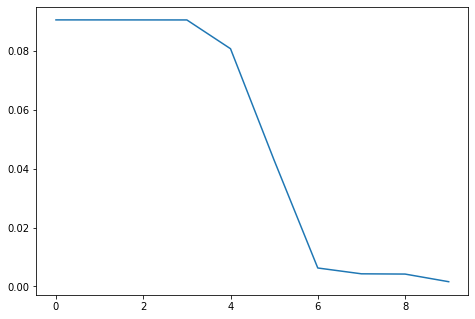

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(np.arange(0, nn.n_epochs), nn.loss)

<ipython-input-4-4138a7d9f7ea>:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-1 * x))


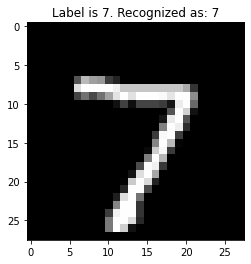

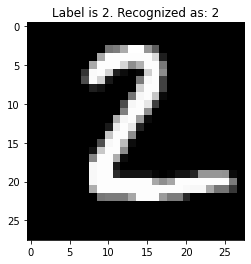

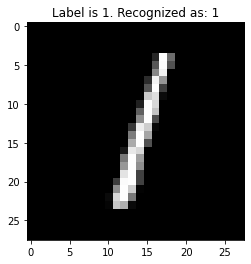

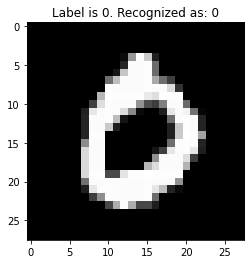

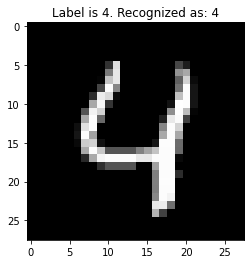

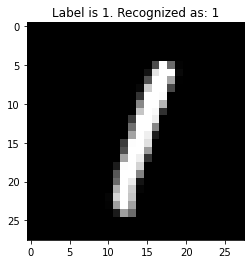

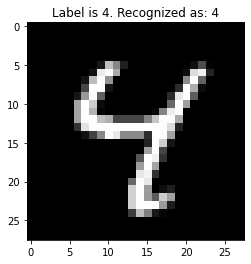

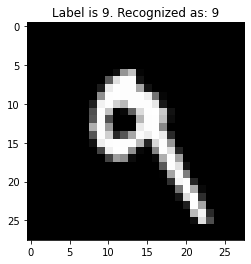

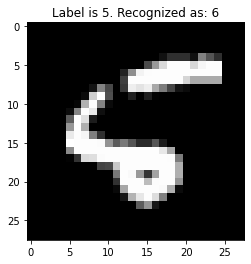

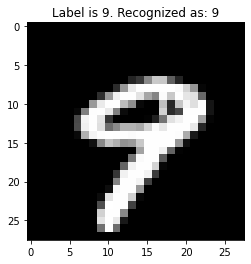

In [17]:
for i in range(10):
    recognized_as = nn.result(input_test[i]).argmax()
    plt.title('Label is {}. Recognized as: {}'.format(test_labels[i], recognized_as))
    plt.imshow(test_images[i], cmap='gray')
    plt.show()
    
